# Theme of this notebook - theories of forex trading (3) - Purchasing Power Parity
* This is a memo for one of the theiries for forex trading - Purchasing Power Parity

# What is Purchasing Power Parity?
* Purchasing Power Parity is one of the theories to forecast the theoretical prices of a target currency.
* Purchasing Power means the financial ability to buy products and services. This theory assumes that the purchasing power between two countries are the same
* E.g. If a certain item costs 120 yen in Japan and 1 dollar in the U.S., and the dollar costs 120 yen, then 120 yen (1 dollar) has the same purchasing power that item as a unit both in Japan and the U.S., and purchasing power parity is established.
* The formula is as follows. (Note: this formula calculate absolute purchasing power parity.)<br>
<b>Theoretical price of currency</b> = $\frac{Price \ level \ in \ the home \ country}{Price \ level \ in \ the \ foreign \ country} $
* This formula indicates that the theoretical price is determined by the ratio of purchasing power between two countries.
* Let's calculate the theoretical price of USD/JPY as an example.

In [61]:
# First, import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import yfinance as yf

In [62]:
# Retrive USD-JPY Yahoo Finance data from 2010M1 to 2023M11 on a monthly basis
usdjpy = yf.download('JPY=X', start='2010-01-01', end='2023-11-30', interval='1mo')

[*********************100%%**********************]  1 of 1 completed


In [63]:
# Create DataFrame
usdjpy = pd.DataFrame(usdjpy.loc['2010-01-01':'2023-11-30', 'Adj Close'])
usdjpy

,Adj Close
Date,
2010-01-01,90.230003
2010-02-01,88.889999
2010-03-01,93.519997
2010-04-01,93.830002
2010-05-01,91.190002
...,...
2023-07-01,140.757996
2023-08-01,146.098999
2023-09-01,149.369995


* Then, let's calculate theoretical prices based on purchasing power
* Data source of purchasing power created by Institute for International Monetary Affairs is as follows.<br>
[Institute for International Monetary Affairs]<br>
https://www.iima.or.jp/docs/ppp/pppdata.xlsx
* CPI = Consumer Price Index, CGPI = Corporate Goods Price Index, EPI = Export Price Index

In [64]:
# In this case, used pre-processed data
ppp = pd.read_csv("fin-009_pppdata.csv").dropna()
ppp

,Date,USD/JPY\nMonthly- Average,based on\nCPI,based on\nCGPI,based on\nEPI
0,201001,91.26,136.54,105.25,73.52
1,201002,90.28,136.67,105.96,73.36
2,201003,90.56,136.92,105.25,72.97
3,201004,93.43,136.89,105.57,74.18
4,201005,91.79,136.96,105.57,72.63
...,...,...,...,...,...
162,202307,155.94,84.62,82.72,106.93
163,202308,157.96,84.32,82.36,108.54
164,202309,157.80,84.29,81.83,109.69
165,202310,158.04,84.93,81.40,111.04


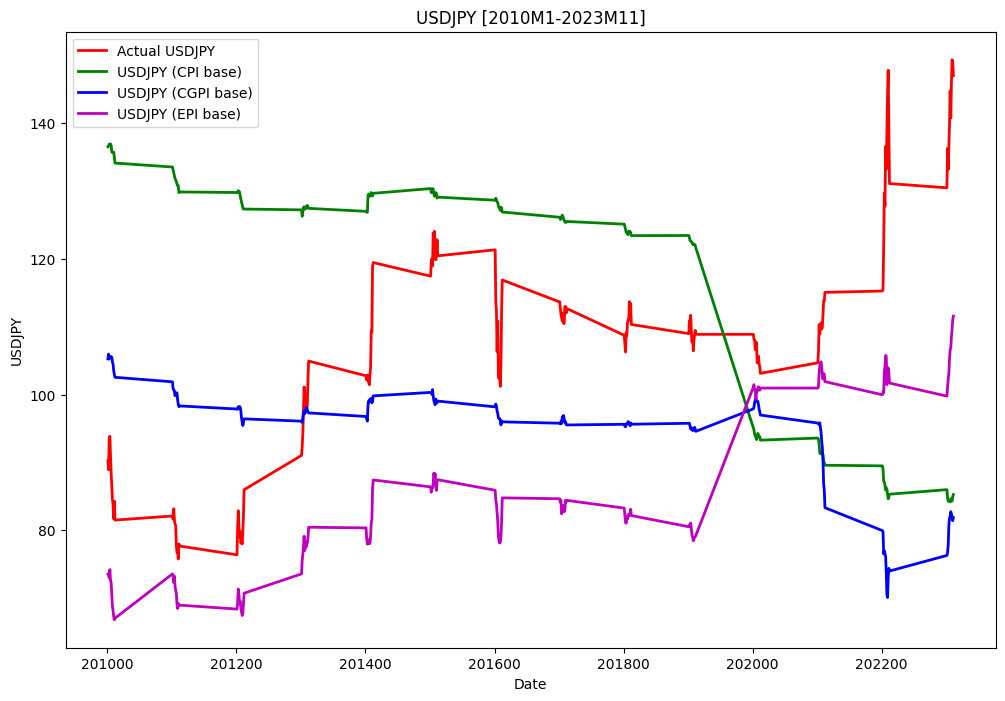

In [65]:
# Vidualize actual prices and theoretical prices by using matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

x = ppp['Date']
actual_price = usdjpy['Adj Close'].values
CPI_base = ppp['based on\nCPI'].values
CGPI_base = ppp['based on\nCGPI'].values
EPI_base = ppp['based on\nEPI'].values

ax.plot(x, actual_price, label='Actual USDJPY', color='r', linewidth=2,linestyle ='solid')
ax.plot(x, CPI_base, label='USDJPY (CPI base)', color='g', linewidth=2)
ax.plot(x, CGPI_base, label='USDJPY (CGPI base)', color='b', linewidth=2)
ax.plot(x, EPI_base, label='USDJPY (EPI base)', color='m', linewidth=2)

ax.set_xlabel('Date',loc='center')
ax.set_ylabel('USDJPY')
ax.set_title('USDJPY [2010M1-2023M11]')

plt.legend(loc = 'best')
plt.show()

# Check R-squared values

In [66]:
# Set intercept to forecast beta by using statsmodel
CPI_price = sm.add_constant(CPI_base)

# Build a simple linear regression model
model_CPI = sm.OLS(actual_price,CPI_price)
result_CPI = model_CPI.fit()
result_CPI.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     114.1
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           1.40e-20
Time:                        00:13:45   Log-Likelihood:                -669.23
No. Observations:                 167   AIC:                             1342.
Df Residuals:                     165   BIC:                             1349.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        179.4170      6.848     26.199      0.000     165.895     192.939
x1            -0.6167      0.058    -10.683      0.000      -0.731      -0.503
==============================================================================
Omnibus:                       46.725   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.776
Skew:                          -0.062   Prob(JB):                       0.0124
Kurtosis:                       1.884   Cond. No.                         784.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Set intercept to forecast beta by using statsmodel
CGPI_price = sm.add_constant(CGPI_base)

# Build a simple linear regression model
model_CGPI = sm.OLS(actual_price,CGPI_price)
result_CGPI = model_CGPI.fit()
result_CGPI.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     166.4
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           8.95e-27
Time:                        00:13:46   Log-Likelihood:                -654.90
No. Observations:                 167   AIC:                             1314.
Df Residuals:                     165   BIC:                             1320.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        259.3243     11.839     21.905      0.000     235.949     282.699
x1            -1.6051      0.124    -12.900      0.000      -1.851      -1.359
==============================================================================
Omnibus:                        2.698   Durbin-Watson:                   0.066
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                2.755
Skew:                          -0.291   Prob(JB):                        0.252
Kurtosis:                       2.762   Cond. No.                     1.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
# Set intercept to forecast beta by using statsmodel
EPI_price = sm.add_constant(EPI_base)

# Build a simple linear regression model
model_EPI = sm.OLS(actual_price,EPI_price)
result_EPI = model_EPI.fit()
result_EPI.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     304.4
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           2.68e-39
Time:                        00:13:46   Log-Likelihood:                -625.84
No. Observations:                 167   AIC:                             1256.
Df Residuals:                     165   BIC:                             1262.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1668      5.556      2.010      0.046       0.196      22.138
x1             1.1256      0.065     17.446      0.000       0.998       1.253
==============================================================================
Omnibus:                       26.506   Durbin-Watson:                   0.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.759
Skew:                          -0.492   Prob(JB):                      0.00170
Kurtosis:                       2.070   Cond. No.                         599.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Compare the R-squared value of each model

In [69]:
# Set variable
r_CPI = result_CPI.rsquared
r_CGPI = result_CGPI.rsquared
r_EPI = result_EPI.rsquared

# print the result
print(f'R-squared value of CPI-base model: {r_CPI}')
print(f'R-squared value of CGPI-base model: {r_CGPI}')
print(f'R-squared value of EPI-base model: {r_EPI}')

R-squared value of CPI-base model: 0.40887418295276046
R-squared value of CGPI-base model: 0.502128582313889
R-squared value of EPI-base model: 0.6484638325313643


* The result indicates that EPI-base model can explain about 64.8% of price changes of USDJPY during 2010M1-2023M11, which is the highest among the three models

# Conclusion
* Python enables us to beautifully describe the relationship between forex prices and purchasing power of specific countries.